In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

(3595, 5999)


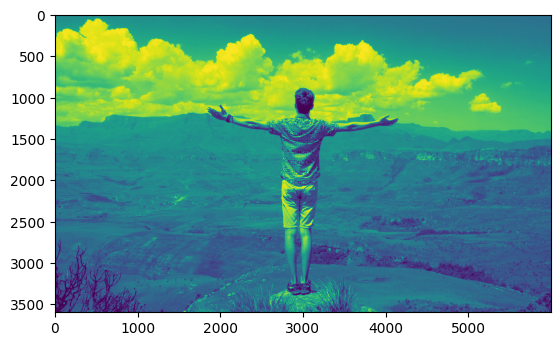

In [5]:
image = cv.imread("Fig01.tif")
#image = cv.cvtColor(image, cv.COLOR_BGR2RGB)/255
plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-572..574].


(500, 500, 3)


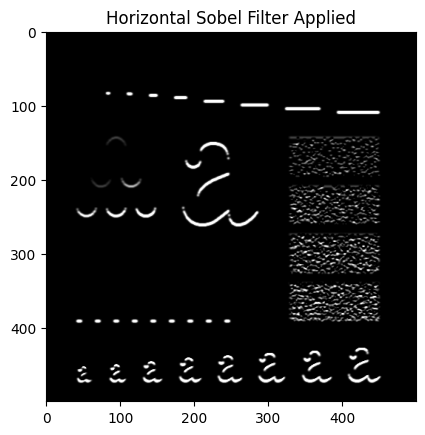

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-572..572].


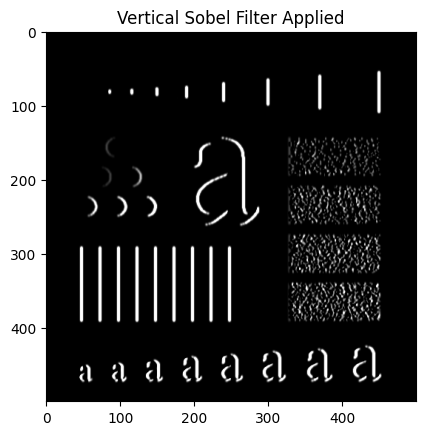

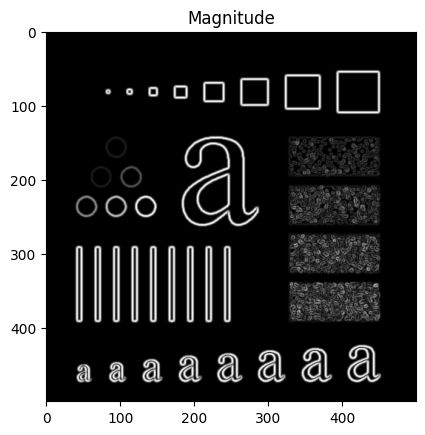

C:\Users\Taimoor\AppData\Local\Temp\ipykernel_22216\1098625295.py:29: RuntimeWarning: divide by zero encountered in divide
  Phase = np.arctan(Vert/Horz)*180/3.1412
C:\Users\Taimoor\AppData\Local\Temp\ipykernel_22216\1098625295.py:29: RuntimeWarning: invalid value encountered in divide
  Phase = np.arctan(Vert/Horz)*180/3.1412


[-90. -45.   0.  45.  90.  nan]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-90.0..90.0].


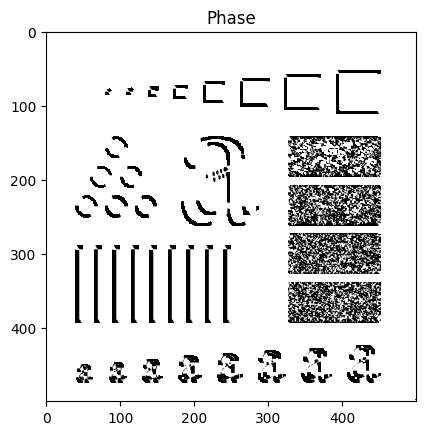

In [97]:
gauss = cv.GaussianBlur(image, (5, 5), 0)

print(gauss.shape)

Horz_Sobel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Vert_Sobel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

#Horz = cv.Sobel(gauss, 3, 1, 0)
#Vert = cv.Sobel(gauss, 3, 0, 1)

Horz = cv.filter2D(gauss,3, Horz_Sobel)
Vert = cv.filter2D(gauss,3, Vert_Sobel)

plt.imshow(Horz)
plt.title("Horizontal Sobel Filter Applied")
plt.show()
plt.imshow(Vert)
plt.title("Vertical Sobel Filter Applied")
plt.show()

#Mag = (cv.normalize(np.sqrt(np.square(np.int32(Horz)) + np.square(np.int32(Vert))), None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)).astype(int)
Mag = np.sqrt(np.square(np.int32(Horz)) + np.square(np.int32(Vert)))
Mag = ((Mag/np.max(Mag))*255).astype(int)

plt.imshow(Mag)
plt.title("Magnitude")
plt.show()

Phase = np.arctan(Vert/Horz)*180/3.1412
Phase = 45*np.round(Phase/45)
print(np.unique(Phase))

for i in range(1,Mag.shape[0] - 1):
    for j in range(1, Mag.shape[1] - 1):
        if (Phase[i,j,0] == 0 and (Mag[i-1,j,0] > Mag[i,j,0] or Mag[i+1,j,0] > Mag[i,j,0])):
            Mag[i,j] = [0,0,0]
        elif (abs(Phase[i,j,0]) == 90 and (Mag[i,j-1,0] > Mag[i,j,0] or Mag[i,j+1,0] > Mag[i,j,0])):
            Mag[i,j] = [0,0,0]
        elif (Phase[i,j,0] == 45 and (Mag[i + 1,j - 1,0] > Mag[i,j,0] or Mag[i - 1,j + 1,0] > Mag[i,j,0])):
            Mag[i,j] = [0,0,0]
        elif (Phase[i,j,0] == -45  and (Mag[i - 1,j - 1,0] > Mag[i,j,0] or Mag[i + 1,j + 1,0] > Mag[i,j,0])):
            Mag[i,j] = [0,0,0]
            

plt.imshow(Phase)
plt.title("Phase")
plt.show()

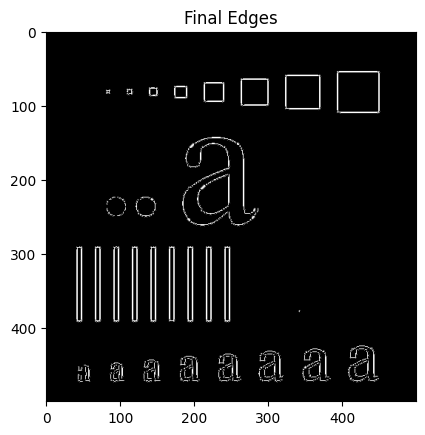

In [98]:
Max = np.max(Mag)

minLim = 0.25
maxLim = 0.75
Inter = np.zeros(Mag.shape)
for i in range(Mag.shape[0]):
    for j in range(Mag.shape[1]):
        if (Mag[i,j,0] >= maxLim*Max):
            Mag[i,j] = [255,255,255]
        elif (Mag[i,j,0] <= minLim*Max):
            Mag[i,j] = [0,0,0]
        else:
            Inter[i,j] = [1,1,1]

for i in range(1,Mag.shape[0] - 1):
    for j in range(1, Mag.shape[1] - 1):
        if (Inter[i,j,0] == 1):
            neighbours = Mag[i-1:i+2,j-1:j+2,0]
            if (255 not in neighbours):
                Mag[i,j] = [0,0,0]
                

FinalEdges = Mag
plt.imshow(FinalEdges)
plt.title("Final Edges")
plt.show()     

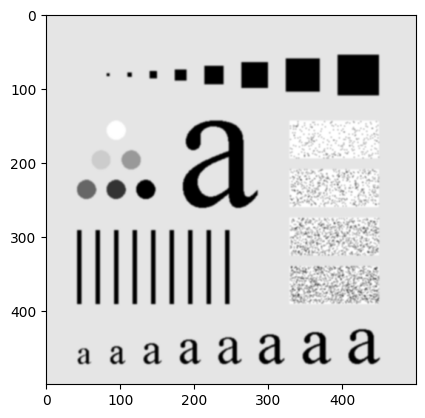

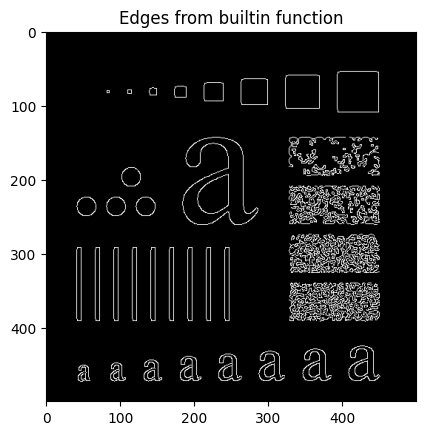

In [100]:
image2 = cv.imread("Fig01.tif")
gauss = cv.GaussianBlur(image2, (5, 5), 0)
plt.imshow(gauss)
plt.show()

t_lower = int(0.25*255)
t_upper = int(0.75*255)

(B, G, R) = cv.split(gauss)
B_cny = cv.Canny(B, t_lower, t_upper)
G_cny = cv.Canny(G, t_lower, t_upper)
R_cny = cv.Canny(R, t_lower, t_upper)
img_cny = cv.merge([B_cny, G_cny, R_cny]) 

plt.imshow(img_cny)
plt.title("Edges from builtin function")
plt.show()   

In [ ]:
#Task 2: Making Harris Edge Detection Algo
gauss = cv.GaussianBlur(image, (5, 5), 0)

Horz_Sobel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Vert_Sobel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

Horz = cv.filter2D(gauss,3, Horz_Sobel)
Vert = cv.filter2D(gauss,3, Vert_Sobel)

Horz2 = np.square(Horz)
Vert2 = np.square(Vert)
Horz_Vert = np.multiply(Horz2,Vert2)

Summation = np.array([[1,1,1], [1,1,1], [1,1,1]])
Horz2_Sum = cv.filter2D(Horz2,3, Summation)
Vert2_Sum = cv.filter2D(Vert2,3, Summation)
Horz_Vert_Sum = cv.filter2D(Horz_Vert,3, Summation)


Det = np.multiply(Horz2_Sum,Vert2_Sum) - np.multiply(Horz_Vert_Sum,Horz_Vert_Sum)
Trace = Horz2_Sum + Vert2_Sum
k = 0.04

R = np.zeros(Horz2_Sum.shape)
#R = Det - k*np.square(Trace)
#maximum = np.max(R)

Eigen = []
for i in range(R.shape[0]):
    Eigen_Row= []
    for j in range(R.shape[1]):
        M = np.array([[Horz2_Sum[i,j,0], Horz_Vert_Sum[i,j,0]], [Horz_Vert_Sum[i,j,0], Vert2_Sum[i,j,0]]])
        eigenvalues, eigenvectors = np.linalg.eig(M)
        Eigen_Row.append(eigenvalues)
        
        #R[i,j] = [0,0,0] if R[i,j,0] < 0.8*maximum else [255,255,255]

    Eigen.append(Eigen_Row)

Eigen = np.array(Eigen)
maximum = np.max(Eigen)

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if (Eigen[i,j,0] > k*maximum and Eigen[i,j,1] > k*maximum):
            R[i,j] = [255,255,255]

#R = cv.GaussianBlur(R, (3,3), 0)

plt.imshow(R.astype(int))
plt.title("Harris Corners")
plt.show()   


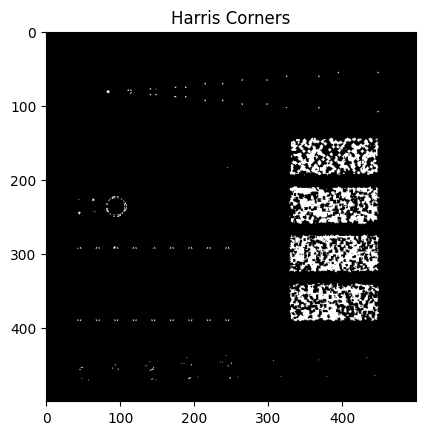

In [96]:
#Task 2: Making Harris Edge Detection Algo
gauss = cv.GaussianBlur(image, (5, 5), 0)

Horz_Sobel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Vert_Sobel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

Horz = np.int64(cv.filter2D(image,3, Horz_Sobel))
Vert = np.int64(cv.filter2D(image,3, Vert_Sobel))

Horz2 = np.uint8(cv.normalize(np.square(Horz), None, alpha = 0, beta = 255, norm_type=cv.NORM_MINMAX))
Vert2 = np.uint8(cv.normalize(np.square(Vert), None, alpha = 0, beta = 255, norm_type=cv.NORM_MINMAX))
Horz_Vert = np.uint8(cv.normalize(Horz2*Vert2, None, alpha = 0, beta = 255, norm_type=cv.NORM_MINMAX))

Horz2_Sum = np.int64(np.zeros(Horz2.shape))
Vert2_Sum = np.int64(np.zeros(Vert2.shape))
Horz_Vert_Sum = np.int64(np.zeros(Horz_Vert.shape))

for i in range(1, Horz2.shape[0] - 1):
    for j in range(1, Horz2.shape[1] - 1):
        Horz2_Sum[i,j] = np.sum(Horz2[i - 1: i + 2, j - 1: j + 2])
        Vert2_Sum[i,j] = np.sum(Vert2[i - 1: i + 2, j - 1: j + 2])
        Horz_Vert_Sum[i,j] = np.sum(Horz_Vert[i - 1: i + 2, j - 1: j + 2])

Det = np.multiply(Horz2_Sum,Vert2_Sum) - np.square(Horz_Vert_Sum)
Trace = Horz2_Sum + Vert2_Sum
k = 0.04
R = Det - k*np.square(Trace)

for i in range(1, R.shape[0] - 1):
    for j in range(1, R.shape[1] - 1):
        R[i,j] = [0,0,0] if R[i,j,0] < 10000 else [255,255,255]

plt.imshow(R.astype(int))
plt.title("Harris Corners")
plt.show()   


In [ ]:
#gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(image[:,:,0],2,3,0.04)

plt.imshow(dst)
plt.title("Harris Corners")
plt.show()  